# 1. Loading and Exploring the Dataset

,patient id,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart disease
0,1,40,1,2,140,289,0,0,172,0,0.0,1,0
1,2,49,0,3,160,180,0,0,156,0,1.0,2,1
2,3,37,1,2,130,283,0,1,98,0,0.0,1,0
3,4,48,0,4,138,214,0,0,108,1,1.5,2,1
4,5,54,1,3,150,195,0,0,122,0,0.0,1,0



'patient id' column dropped.


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart disease
count,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.600000,0.78400,3.249000,132.27000,203.371000,0.224000,0.661000,138.181000,0.396000,0.916000,1.629000,0.540000
std,9.336336,0.41172,0.927286,18.28933,106.739593,0.417131,0.841895,25.453922,0.489309,1.069621,0.614603,0.498647
min,28.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.00000,3.000000,120.00000,179.750000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.00000,4.000000,130.00000,226.000000,0.000000,0.000000,140.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.00000,4.000000,140.00000,268.000000,0.000000,1.000000,158.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.00000,4.000000,200.00000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


,0
age,int64
sex,int64
chest pain type,int64
resting bp s,int64
cholesterol,int64
fasting blood sugar,int64
resting ecg,int64
max heart rate,int64
exercise angina,int64
oldpeak,float64


,Missing Values,Percentage


No missing values to visualize.


<ipython-input-37-8ec275d6877a>:48: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


,0


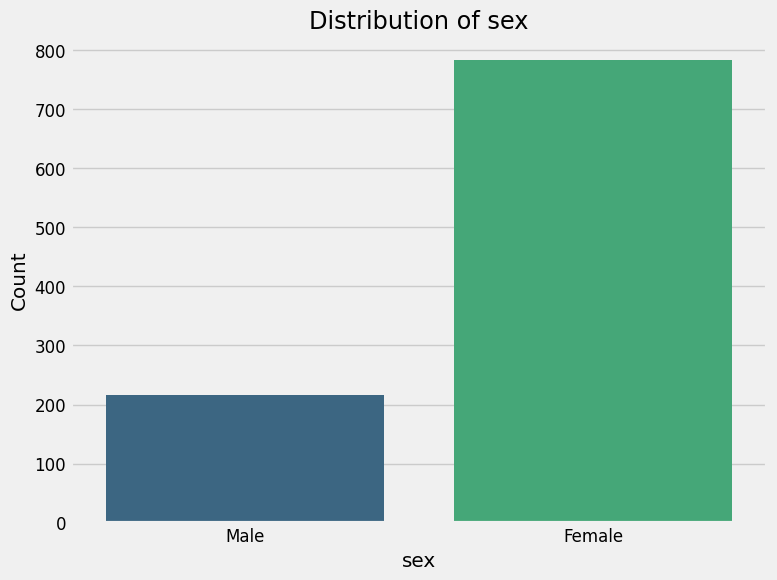

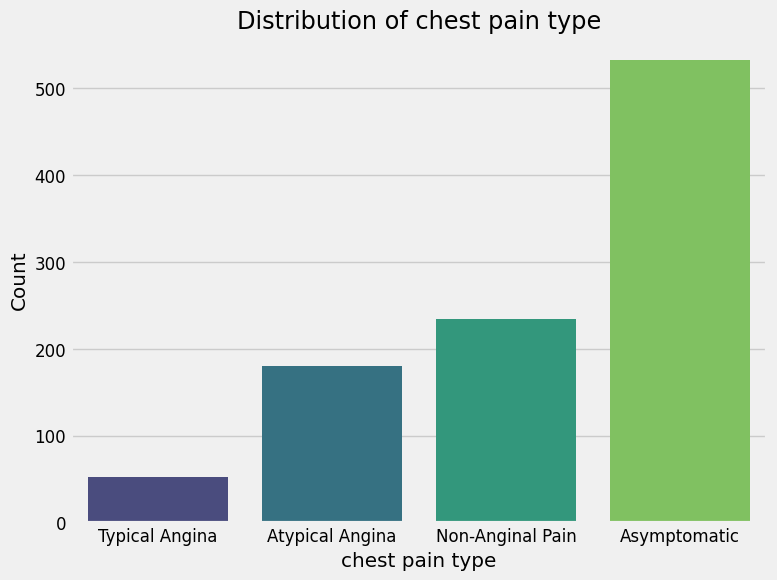

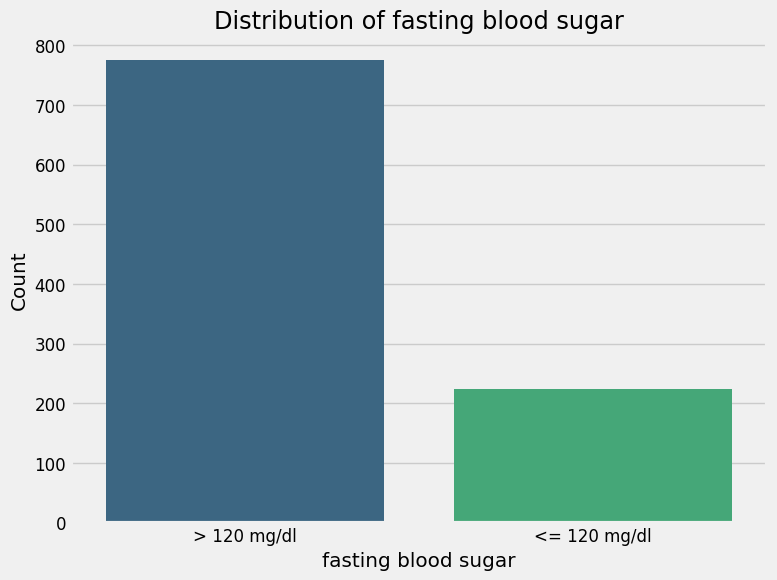

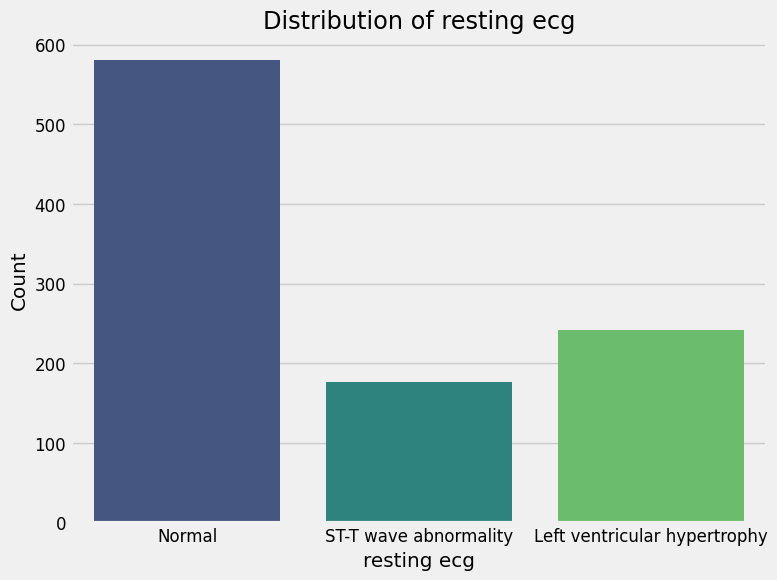

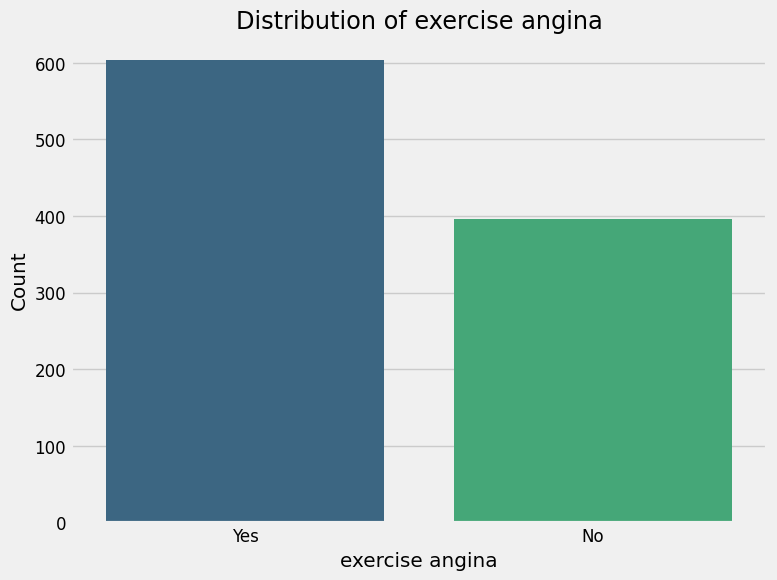

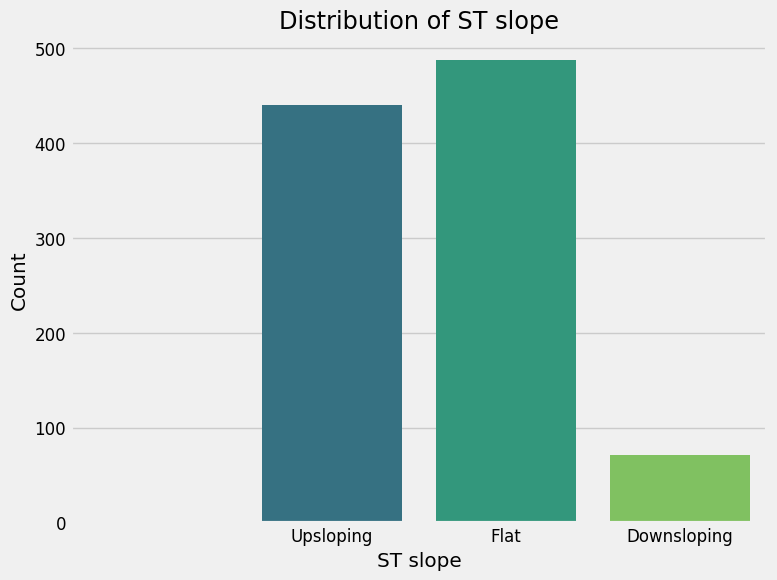

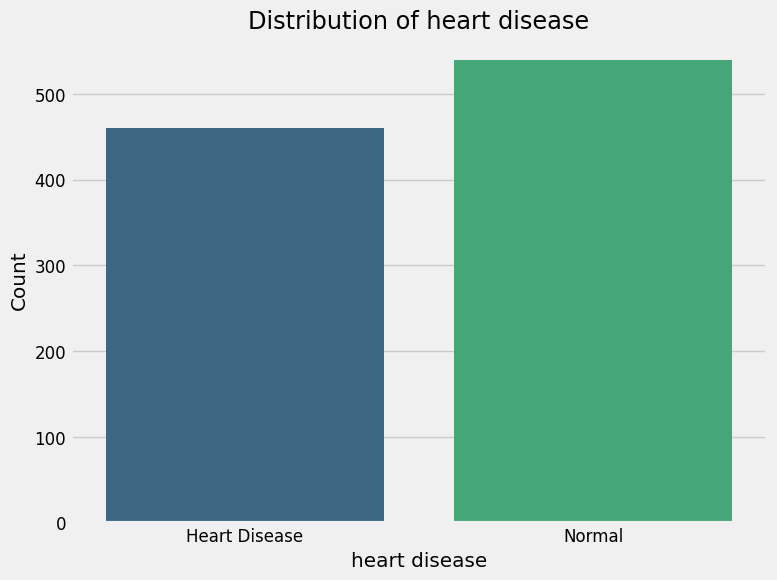

Cleaned data saved to 'cleaned_heart_disease.csv'.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display

# Load the dataset
data = pd.read_csv('heart_disease.csv')

# Display the first few rows of the dataset using display instead of print
display(data.head())

# Drop the 'patient id' column if it exists
if 'patient id' in data.columns:
    data.drop('patient id', axis=1, inplace=True)
    print("\n'patient id' column dropped.")
else:
    print("\nNo 'patient id' column to drop.")

# Summary statistics and data types
display(data.describe())
display(data.dtypes)

# Check for any missing values and calculate the percentage of missing values for each feature
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.concat([missing_values, missing_percentage], axis=1)
missing_data.columns = ['Missing Values', 'Percentage']
missing_data = missing_data[missing_data['Missing Values'] > 0]
display(missing_data)

# Visualizing missing data using seaborn with percentage annotations
if not missing_data.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(data.isna(), cbar=False, cmap='viridis')
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data.iloc[i, j] == True:
                plt.text(j + 0.5, i + 0.5, f'{missing_data.iloc[j, 1]:.2f}%', ha='center', va='center', color='white')
    plt.title("Visualization of Missing Data")
    plt.show()
else:
    print("No missing values to visualize.")

# Filling missing values: Numeric columns with median, categorical with mode
for column in data.columns:
    if data[column].dtype in ['float64', 'int64']:
        data[column].fillna(data[column].median(), inplace=True)
    elif data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)

# Recheck missing values
missing_values = data.isna().sum()
display(missing_values[missing_values > 0])


# # Identify and remove duplicate rows
# duplicates = data.duplicated().sum()
# print(f"\nNumber of duplicate entries: {duplicates}")
# if duplicates > 0:
#     data = data.drop_duplicates()
#     print("Duplicates removed.")
# else:
#     print("No duplicate entries found.")

# Correcting data types for categorical features explicitly
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'heart disease']
data[categorical_features] = data[categorical_features].astype('category')

# Plotting histograms for categorical columns
labels = {
    'sex': {1: 'Male', 0: 'Female'},
    'chest pain type': {1: 'Typical Angina', 2: 'Atypical Angina', 3: 'Non-Anginal Pain', 4: 'Asymptomatic'},
    'fasting blood sugar': {1: '> 120 mg/dl', 0: '<= 120 mg/dl'},
    'resting ecg': {0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Left ventricular hypertrophy'},
    'exercise angina': {1: 'Yes', 0: 'No'},
    'ST slope': {0: '', 1: 'Upsloping', 2: 'Flat', 3: 'Downsloping'},
    'heart disease': {1: 'Heart Disease', 0: 'Normal'}
}

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data, hue=col, palette='viridis', legend=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    if col in labels:
        plt.xticks(ticks=range(len(labels[col])), labels=labels[col].values())
    plt.show()

# Plotting boxplots for numerical columns using Plotly for an interactive visualization
numerical_cols = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
for col in numerical_cols:
    fig = px.box(data, y=col, title=f'Box Plot of {col}')
    fig.show()

# Saving the cleaned data to a new CSV file
data.to_csv('heart_disease.csv', index=False)
print("Cleaned data saved to 'cleaned_heart_disease.csv'.")

# Correlation Analysis and Visualization

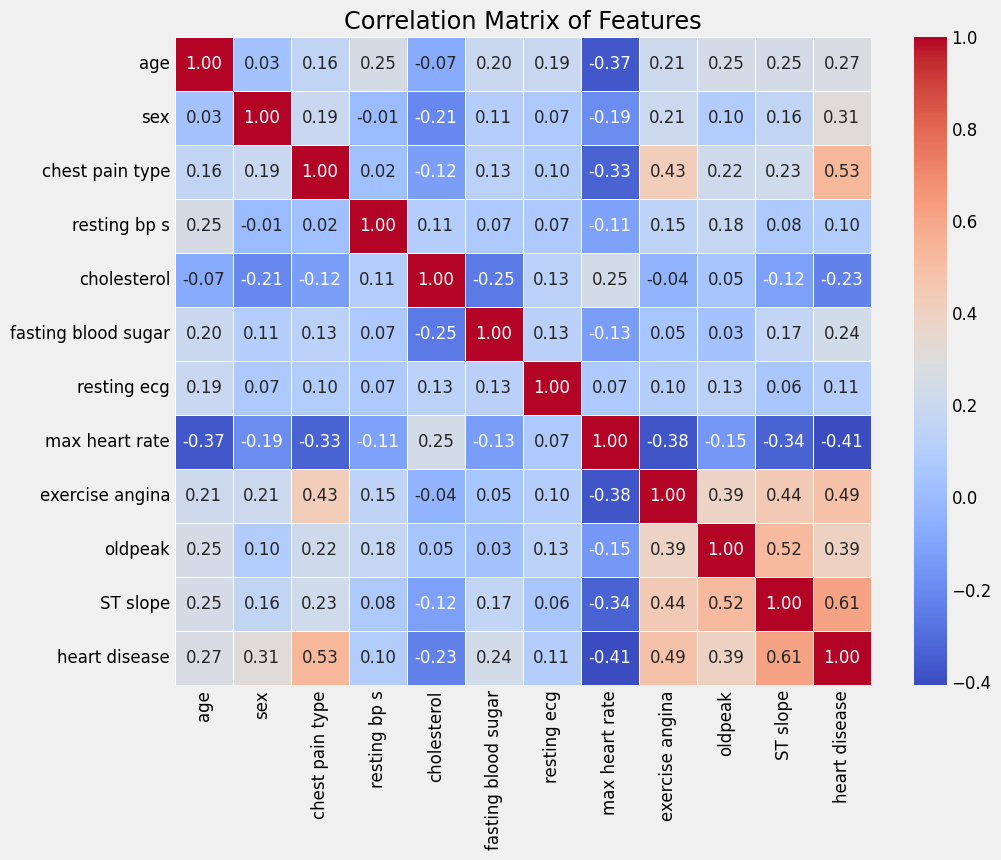

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import chi2_contingency, ttest_ind

# Calculating correlations between numerical and categorical features
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create an empty DataFrame to store correlation values
corr_df = pd.DataFrame(index=data.columns, columns=data.columns)

# Fill the DataFrame with correlation values
for i in data.columns:
    for j in data.columns:
        if data[i].dtype == 'category' and data[j].dtype == 'category':
            corr_df.loc[i, j] = cramers_v(data[i], data[j])
        else:
            corr_df.loc[i, j] = data[i].corr(data[j])

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df.astype(float), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Statistical Significance of Features

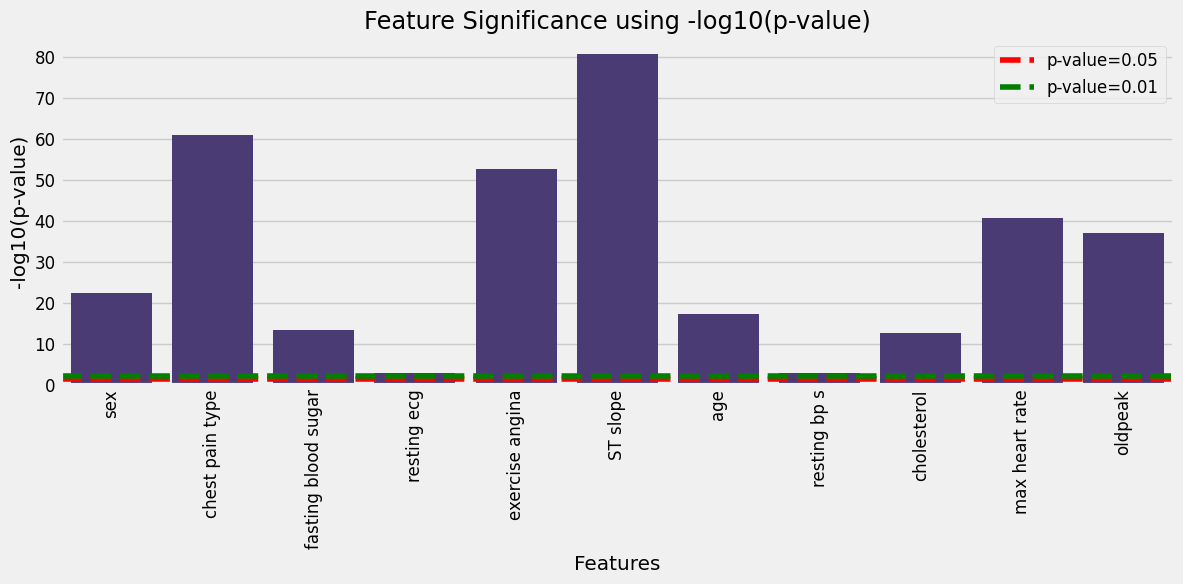

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

# Define the categorical features
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']

# Define the numerical features
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']

# Define the target variable
target = 'heart disease'

# Initial empty lists to hold the p-values and feature names
p_values = []
features = []

# For categorical features - chi-squared test
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values.append(p)
    features.append(feature)

# For numerical features - t-test
for feature in numerical_features:
    t_stat, p = ttest_ind(
        data[data[target] == 0][feature],
        data[data[target] == 1][feature]
    )
    p_values.append(p)
    features.append(feature)

# Convert p-values to -log10(p-values)
negative_log_p_values = -np.log10(p_values)

# Create a bar plot of -log10(p-values)
plt.figure(figsize=(12, 6))
sns.barplot(x=features, y=negative_log_p_values)
plt.xticks(rotation=90)  # Rotate the x labels so they don't overlap
plt.xlabel('Features')
plt.ylabel('-log10(p-value)')
plt.title('Feature Significance using -log10(p-value)')
plt.axhline(-np.log10(0.05), color='red', linestyle='dashed', label='p-value=0.05')
plt.axhline(-np.log10(0.01), color='green', linestyle='dashed', label='p-value=0.01')
plt.legend()
plt.tight_layout()
plt.show()

# Data Preprocessing and Splitting for Model Training

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the feature sets we excluded resting ecg and resting bp s
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'exercise angina', 'ST slope']
numerical_features = ['age', 'cholesterol', 'max heart rate', 'oldpeak']

# Scaling numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Define the selected features
selected_features = categorical_features + numerical_features

# Split the dataset into features (X) and target variable (y)
X = data[selected_features]
y = data['heart disease']  # Adjust if the target variable has a different name

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Your data is now ready for model training
print("Data preprocessing complete. Data is ready for model training.")


Data preprocessing complete. Data is ready for model training.


# Model Training, Evaluation, and Feature Importance for Random Forest

Accuracy: 0.885
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        93
           1       0.89      0.90      0.89       107

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.89      0.88       200



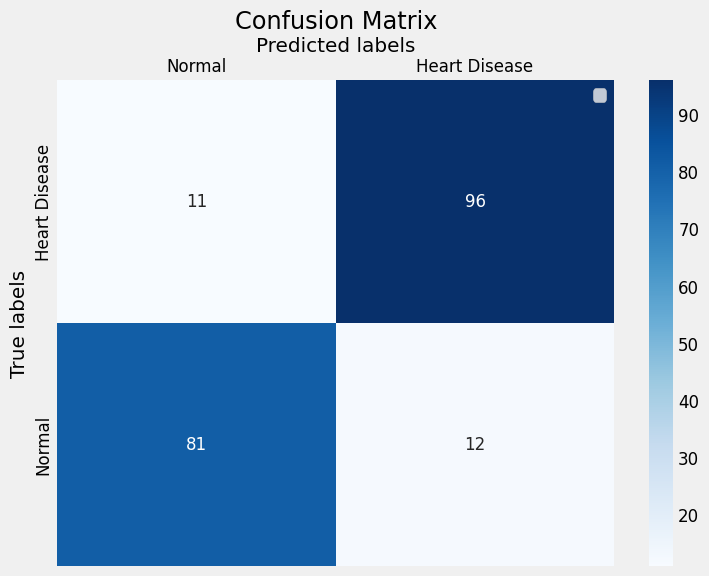

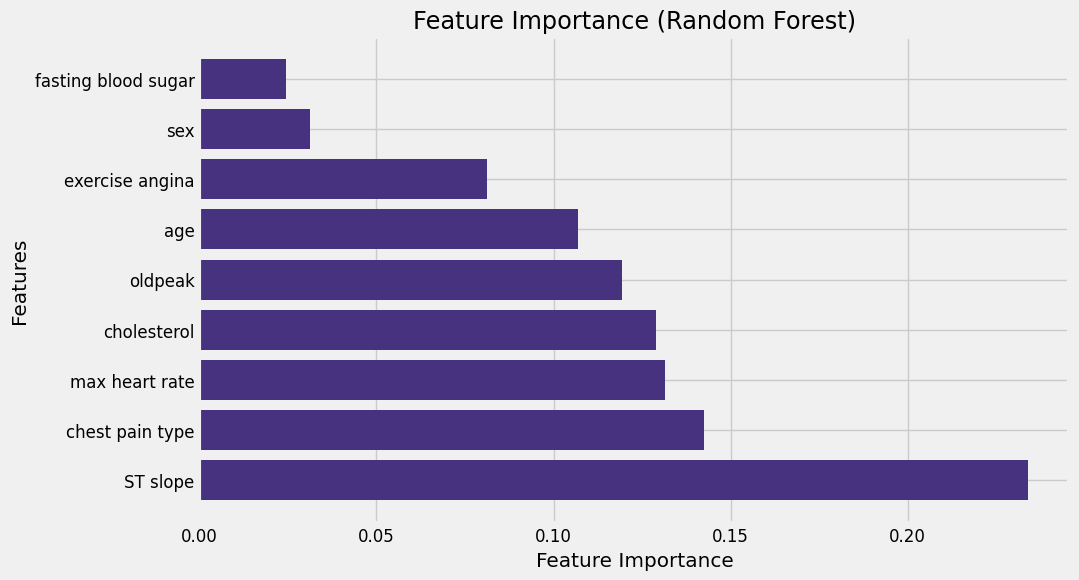

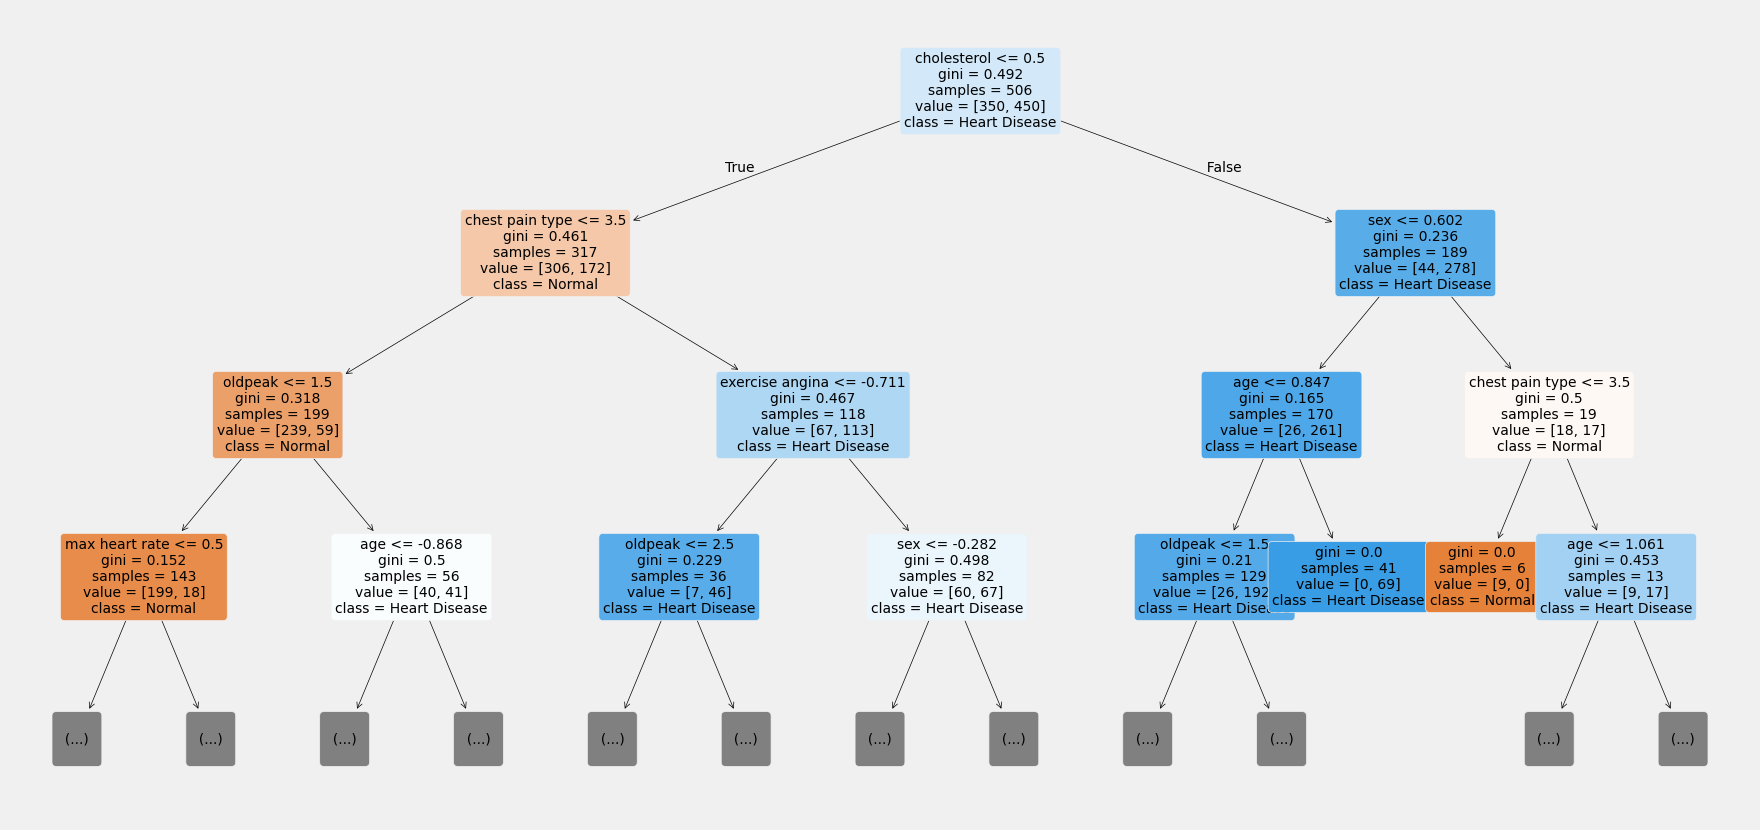

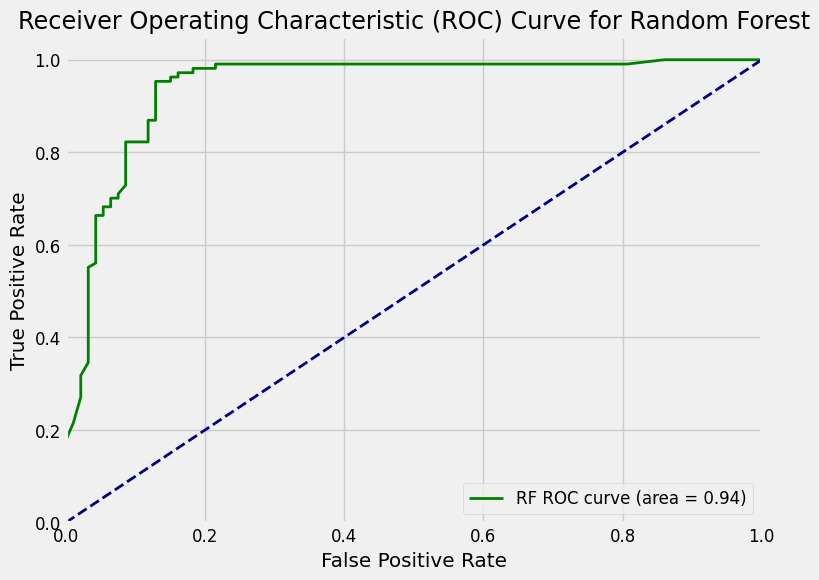

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc, accuracy_score, precision_score, recall_score, f1_score


# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Labels, title, and legend
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.xticks(ticks=[0.5, 1.5], labels=['Normal', 'Heart Disease'])
plt.yticks(ticks=[0.5, 1.5], labels=['Normal', 'Heart Disease'])
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.legend(['True Negative', 'False Positive', 'False Negative', 'True Positive'], loc='upper right')

plt.show()

# Simplified tree visualization
from sklearn.tree import plot_tree

# Get feature importance
importances = rf_classifier.feature_importances_
indices = (-importances).argsort()[:len(numerical_features) + len(categorical_features)]

# Select only the relevant features for visualization
selected_features = [X.columns[i] for i in indices]


# Visualize feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), selected_features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Random Forest)')
plt.show()


# Visualize the first decision tree in the Random Forest
plt.figure(figsize=(20,10))
plot_tree(rf_classifier.estimators_[0], feature_names=selected_features, class_names=['Normal', 'Heart Disease'], max_depth=3, filled=True, rounded=True, fontsize=10)
plt.show()

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Model Training, Evaluation, and Feature Importance for Gradient Boosting

Accuracy (Gradient Boosted Tree): 0.895
Classification Report (Gradient Boosted Tree):
              precision    recall  f1-score   support

           0       0.89      0.88      0.89        93
           1       0.90      0.91      0.90       107

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200



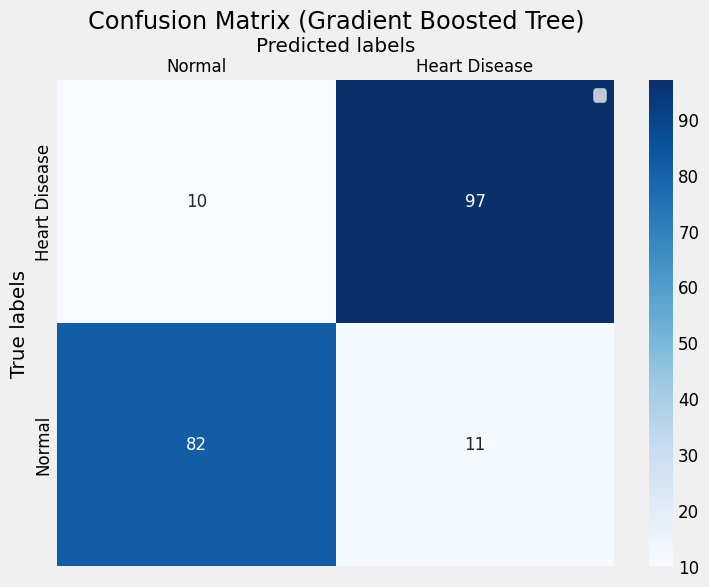

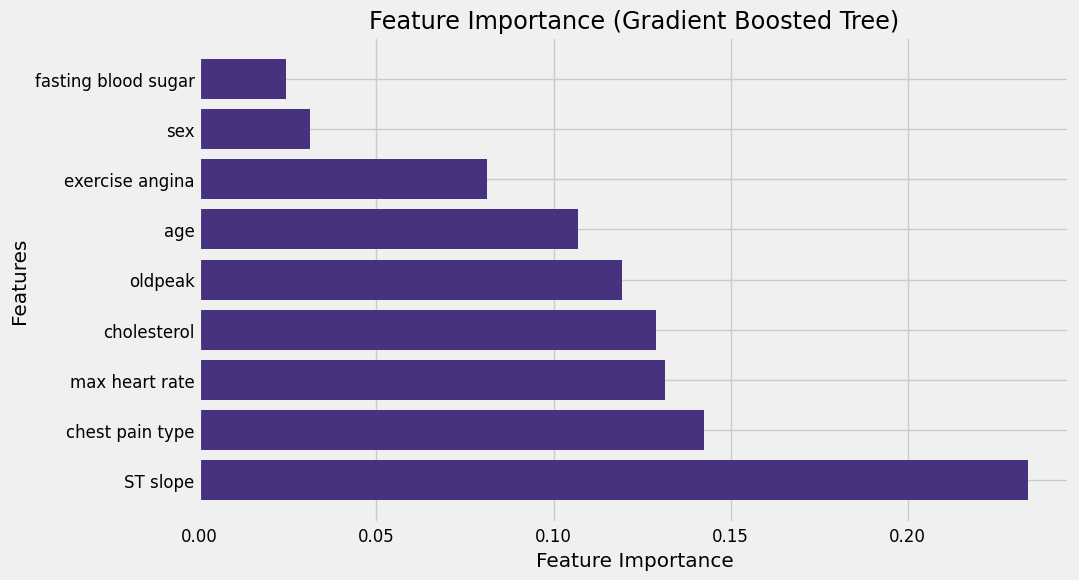

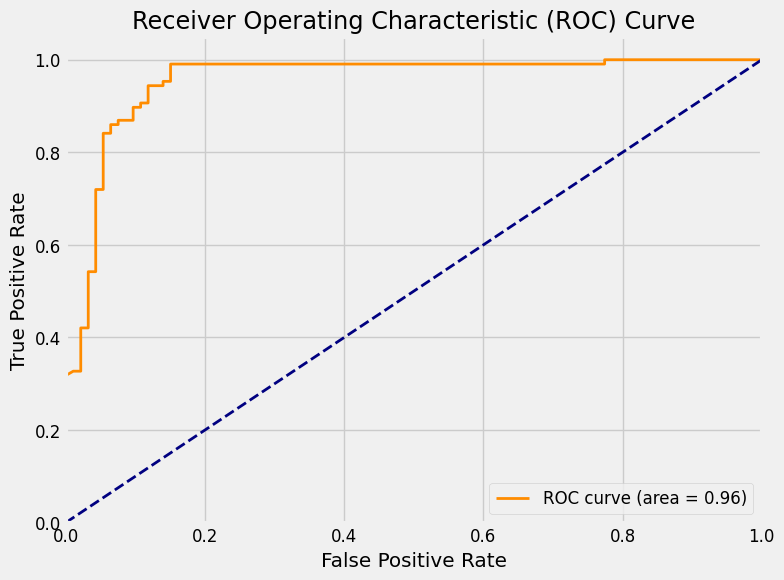

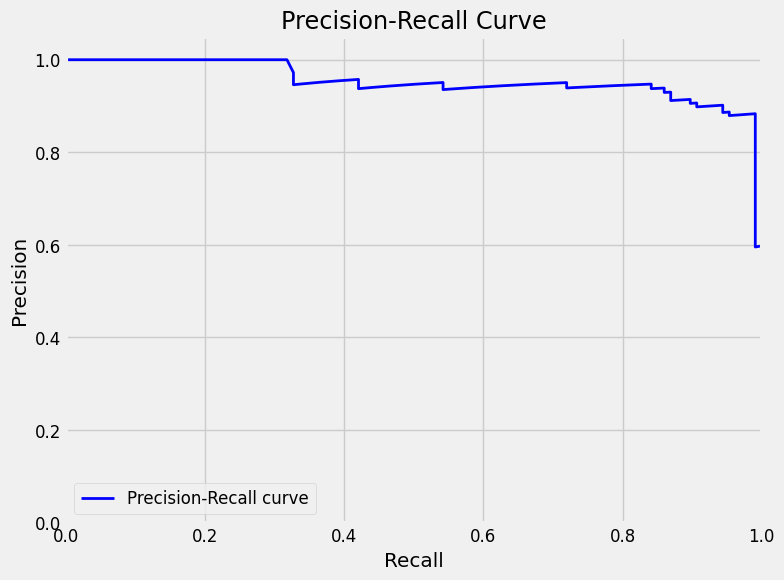

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# Initialize the Gradient Boosted Tree classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy (Gradient Boosted Tree):", accuracy_gb)

# Classification report
print("Classification Report (Gradient Boosted Tree):")
print(classification_report(y_test, y_pred_gb))

# Confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues")

# Labels, title, and legend
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (Gradient Boosted Tree)")
plt.xticks(ticks=[0.5, 1.5], labels=['Normal', 'Heart Disease'])
plt.yticks(ticks=[0.5, 1.5], labels=['Normal', 'Heart Disease'])
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.legend(['True Negative', 'False Positive', 'False Negative', 'True Positive'], loc='upper right')

plt.show()

# Visualize feature importance for Gradient Boosted Tree
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance (Gradient Boosted Tree)')
plt.show()

# Calculate ROC curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_classifier.predict_proba(X_test)[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve
precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_classifier.predict_proba(X_test)[:, 1])

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_gb, precision_gb, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()


# Model Training, Evaluation, and ROC Curve for K-Nearest Neighbors (KNN)

Accuracy (KNN): 0.825
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        93
           1       0.81      0.89      0.84       107

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



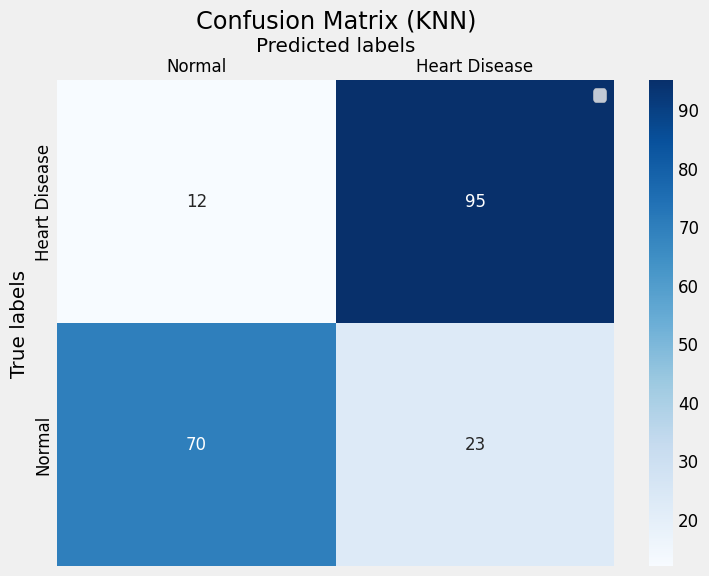

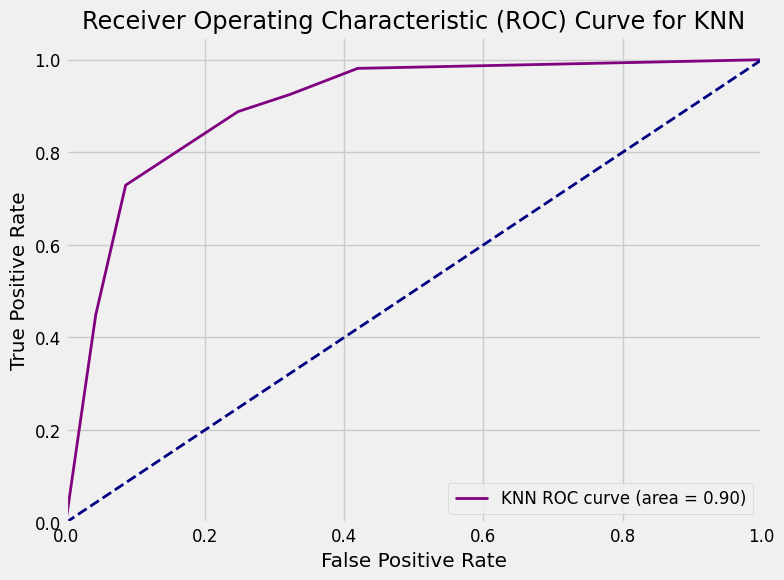

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (KNN):", accuracy_knn)


# Classification report
print("Classification Report (KNN):")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues")

# Labels, title, and legend
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix (KNN)")
plt.xticks(ticks=[0.5, 1.5], labels=['Normal', 'Heart Disease'])
plt.yticks(ticks=[0.5, 1.5], labels=['Normal', 'Heart Disease'])
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')
plt.legend(['True Negative', 'False Positive', 'False Negative', 'True Positive'], loc='upper right')

plt.show()

# Calculate ROC curve for KNN
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_classifier.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()


# Performance Comparison of Machine Learning Models (Random Forest, Gradient Boosted Tree, KNN)

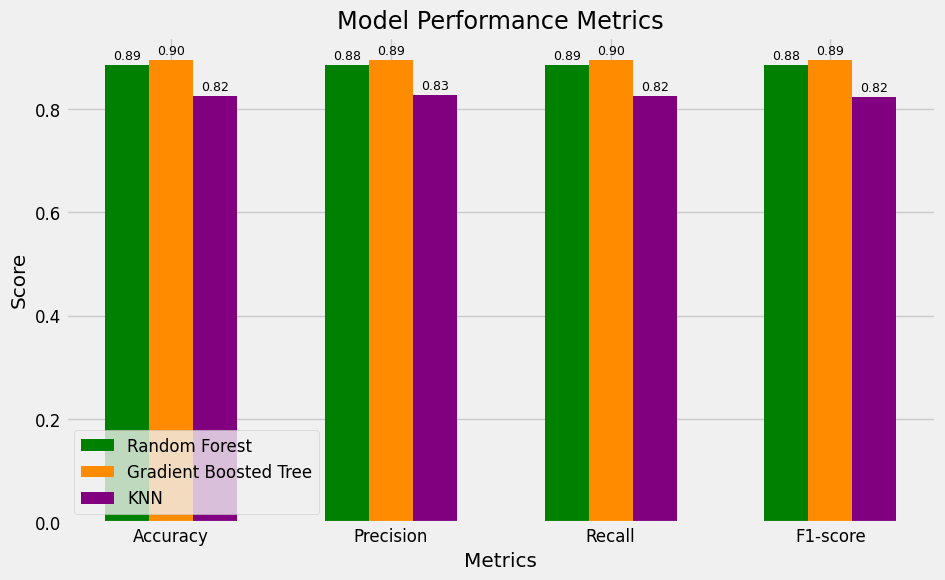

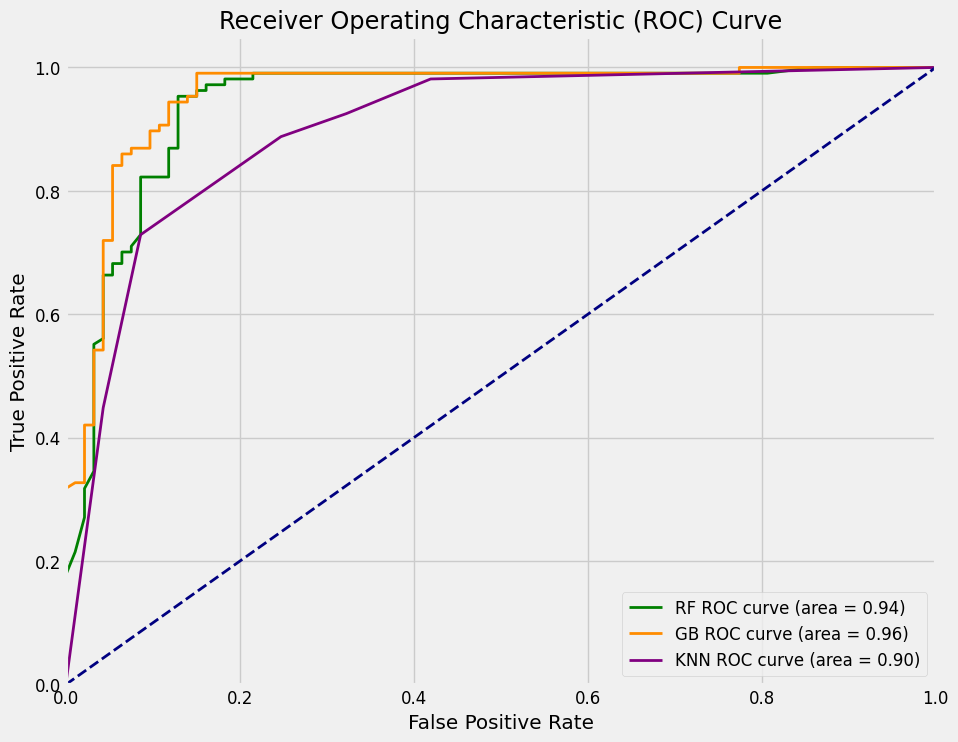

In [44]:
# Accuracy, Precision, Recall, F1-score
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, F1-score
precision_rf, recall_rf, f1_score_rf, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
precision_gb, recall_gb, f1_score_gb, _ = precision_recall_fscore_support(y_test, y_pred_gb, average='weighted')
precision_knn, recall_knn, f1_score_knn, _ = precision_recall_fscore_support(y_test, y_pred_knn, average='weighted')

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Plotting with numbers on bars
plt.figure(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
rf_values = [accuracy_rf, precision_rf, recall_rf, f1_score_rf]
gb_values = [accuracy_gb, precision_gb, recall_gb, f1_score_gb]
knn_values = [accuracy_knn, precision_knn, recall_knn, f1_score_knn]

# Bar positions
index = range(len(metrics))

# Plotting
plt.bar(index, rf_values, bar_width, color='green', label='Random Forest')
plt.bar([i + bar_width for i in index], gb_values, bar_width, color='darkorange', label='Gradient Boosted Tree')
plt.bar([i + bar_width*2 for i in index], knn_values, bar_width, color='purple', label='KNN')

# Adding numbers to bars
for i, v in enumerate(rf_values):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=9)
for i, v in enumerate(gb_values):
    plt.text(i + bar_width, v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=9)
for i, v in enumerate(knn_values):
    plt.text(i + bar_width*2, v + 0.005, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

# Labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.xticks([i + bar_width for i in index], metrics)
plt.legend()
plt.show()

# ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='RF ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='GB ROC curve (area = %0.2f)' % roc_auc_gb)
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='KNN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()